# Programming Exercise 1: Linear Regression

## 1. Linear regression with one variable

In [33]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [34]:
df = pd.read_csv('ex1data1.txt', names=['Population', 'Profit']) #读取数据并赋予列名

In [35]:
df.head()#显示前五行

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [87]:
df.describe()

,Ones,Population,Profit
count,97.0,97.000000,97.000000
mean,1.0,8.159800,5.839135
std,0.0,3.869884,5.510262
min,1.0,5.026900,-2.680700
25%,1.0,5.707700,1.986900
50%,1.0,6.589400,4.562300
75%,1.0,8.578100,7.046700
max,1.0,22.203000,24.147000


原始数据图像

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


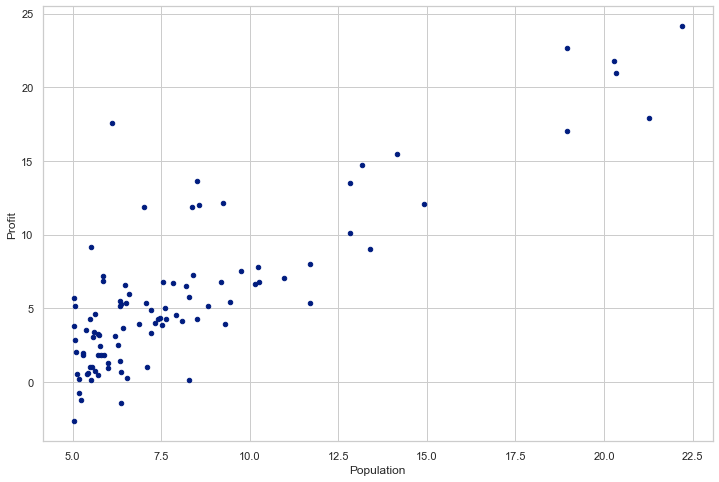

In [90]:
df.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

创建一个以参数$\theta$为特征函数的代价函数
$$J\left(\theta\right)=\frac{1}{2m}\sum^{m}_{i=1}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^2$$
其中:
$$h_{\theta}(x)=\theta^{T}X=\theta_{0}x_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\cdots+\theta_{n}x_{n}$$

In [39]:
def computeCost(X, y, theta): 
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

在训练集中添加一列，以便使用向量化的解决方案来计算代价和梯度

In [40]:
df.insert(0, 'Ones', 1)

下面进行变量初始化

In [41]:
# set X (training data) and y (target variable)
cols = df.shape[1]
X = df.iloc[:, 0:cols-1]
y = df.iloc[:,cols-1:cols]

In [42]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [43]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [44]:
# 转换X,y为numpy矩阵
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0])) # 初始化theta

In [45]:
theta

matrix([[0, 0]])

In [46]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数(theta初始值为0)

In [47]:
computeCost(X, y, theta)

32.072733877455676

## 2. Batch Gradient Decent

$$\theta_{j}:= \theta_{j}-\alpha\frac{\partial}{\partial\theta_{j}}J(\theta)$$

In [48]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
            
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

初始化一些附加变量——学习速率$\alpha$和要执行的迭代次数

In [49]:
alpha = 0.01
iters = 1000

In [66]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [51]:
computeCost(X, y, g)

4.515955503078914

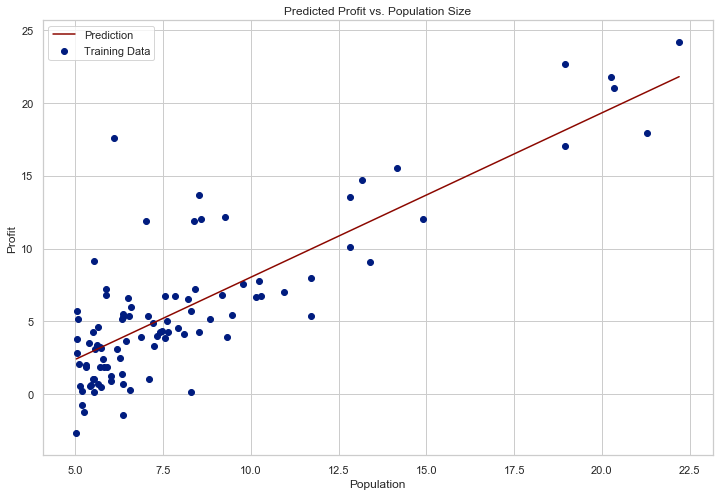

In [52]:
x = np.linspace(df.Population.min(), df.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.Population, df.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

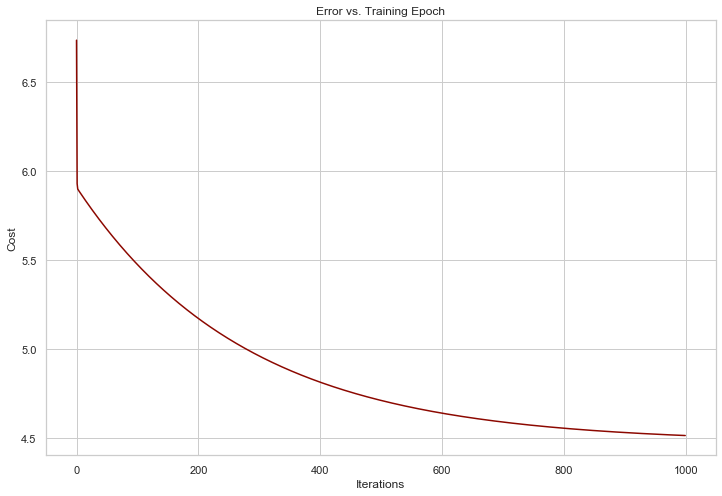

In [53]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 3. Linear regression with multiple variables

In [79]:
df2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms','Price']) #读取数据并赋予列名
df2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


进行特征归一化

In [80]:
df2 = (df2 - df2.mean()) / df2.std()
df2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [82]:
# add ones column
df2.insert(0, 'Ones', 1)

# set X(training data) and y(target varible)
cols = df2.shape[1]
X2 = df2.iloc[:, 0:cols-1]
y2 = df2.iloc[:, cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.1307033696077189

快速查看训练进程

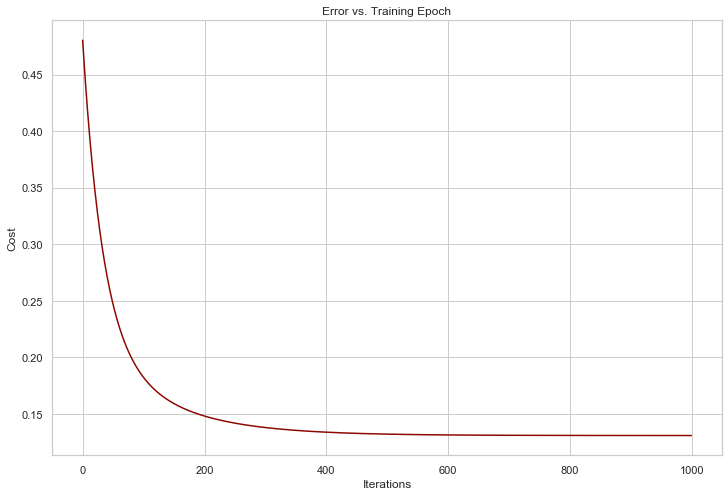

In [83]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 4. Normal Equations

$$\theta=(X^{T}X)^{-1}X^{T}y$$

In [84]:
# normal equation
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y #X.T@X等价于X.T.dot(X)
    return theta

In [85]:
final_theta2 = normalEqn(X, y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])